### 간단한 분류 문제 (붓꽃 분류)

- 꽃잎(petal)과 꽃받침(sepal)의 폭과 길이 값만 보고 붓꽃의 종류를 분류하는 문제
- 붓 꽃의 종류에는 setosa, versicolor, virginica 세가지로 가정 
- 이는 답을 알고 있으므로 지도학습에 속한다. 분류할 품종을 클래스, 레이블이라고 부른다

#### 데이터 읽기
- 파이선 라이브러리에 데이터가 이미 들어있으므로 load_iris 함수로 바로 데이터를 읽을 수 있다.
- 읽은 데이터를 번치(bunch) 타입으로 저장되는데 이는 딕셔너리와 유사한 객체로 키와 값의 쌍으로 구성된다. 번치 타입의 다양한 데이터를 묶어서 한번에 제공할 때 편리하게 사용되는 한 방법이다.

### sklearn
- 머신러닝을 위한 알고리즘을 내장하고 있는 라이브러리
- 머신러닝 연습을 위한 훈련데이터도 내장하고 있음!

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
type(iris_dataset)

sklearn.utils.Bunch

In [3]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


- DESCR에는 (description) 데이터셋에 대한 설명이 들어 있으며 이의 내용을 일부 읽어보겠다
- 여러 키 값의 내용이 무엇인지 확인해본다. 분석할 대상 데이터는 data와 target 컬럼에 들어 있다

In [4]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#실제데이터는 target과 data필드에 들어있음!
#데이터 배열의 행은 개개의 꽃이 되며 열은 각 꽃에서 구한 네개의 측정치
print(iris_dataset.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
import pandas as pd

In [9]:
Train = pd.DataFrame(iris_dataset.data)

In [10]:
#150개의 붓꽃데이터 - 머신러닝에서 각 아이템은 샘플, 속성은 특성이라고 부름
Train

0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
5    5.4  3.9  1.7  0.4
6    4.6  3.4  1.4  0.3
7    5.0  3.4  1.5  0.2
8    4.4  2.9  1.4  0.2
9    4.9  3.1  1.5  0.1
10   5.4  3.7  1.5  0.2
11   4.8  3.4  1.6  0.2
12   4.8  3.0  1.4  0.1
13   4.3  3.0  1.1  0.1
14   5.8  4.0  1.2  0.2
15   5.7  4.4  1.5  0.4
16   5.4  3.9  1.3  0.4
17   5.1  3.5  1.4  0.3
18   5.7  3.8  1.7  0.3
19   5.1  3.8  1.5  0.3
20   5.4  3.4  1.7  0.2
21   5.1  3.7  1.5  0.4
22   4.6  3.6  1.0  0.2
23   5.1  3.3  1.7  0.5
24   4.8  3.4  1.9  0.2
25   5.0  3.0  1.6  0.2
26   5.0  3.4  1.6  0.4
27   5.2  3.5  1.5  0.2
28   5.2  3.4  1.4  0.2
29   4.7  3.2  1.6  0.2
..   ...  ...  ...  ...
120  6.9  3.2  5.7  2.3
121  5.6  2.8  4.9  2.0
122  7.7  2.8  6.7  2.0
123  6.3  2.7  4.9  1.8
124  6.7  3.3  5.7  2.1
125  7.2  3.2  6.0  1.8
126  6.2  2.8  4.8  1.8
127  6.1  3.0  4.9  1.8
128  6.4  2.8  5.6  2.1
129  7.2  3.0  5.8  1.6
130  7.4  2.8  6.1  1.9
131  7.9  3.8  6.4  2.0
132  6.4  2.8  5.6  2.2
133  6.3  2.8  5.1  1.5
134  6.1  2.6  5.6  1.4
135  7.7  3.0  6.1  2.3
136  6.3  3.4  5.6  2.4
137  6.4  3.1  5.5  1.8
138  6.0  3.0  4.8  1.8
139  6.9  3.1  5.4  2.1
140  6.7  3.1  5.6  2.4
141  6.9  3.1  5.1  2.3
142  5.8  2.7  5.1  1.9
143  6.8  3.2  5.9  2.3
144  6.7  3.3  5.7  2.5
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]

In [11]:
Train.tail()

0    1    2    3
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

- data 나 target의 타입은 numpy 이다.
- 데이터 항목들을 샘플, instance라고도 부른다
- 샘플의 각 특성을 피처라고 한다 (여기서는 4가지 값을 말함)
- target은 1차원 배열이다, 붓꽃 세가지 종류는 0, 1, 2 로 구분되어 있다

In [12]:
print("데이터열과행의수: {}".format(iris_dataset['data'].shape))

데이터열과행의수: (150, 4)


In [13]:
print("처음 5개의 붓꽃:\n{}".format(iris_dataset['data'][:5]))

처음 5개의 붓꽃:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [15]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 훈련과 테스트
- 자, 이제 이 데이터로 머신러닝 모델을 만들고 새로운 데이터의 품종을 예측해보자
- 만든 모델을 새 데이터에 적용하기 전에 이 모델이 진짜 잘 작동하는지 알아야 함 - 우리가 만든 모델의 예측을 신뢰할수 있는지 알아야함
- 모델을 훈련할 때 사용한 데이터를 가지고 평가(테스트)를 하면 안된다 - 대명제!
- 일반화 기능을 보장할 수 없기 때문이다
- 따라서 훈련데이터와 테스트 데이터를 나누어 작업해야 한다
- 테스트 데이터를 hold out set라고도 부른다

- 데이터를 자동으로 나누어 주는 함수 train_test_split가 있다 (주의해서 사용해야 함!) - 75% 25%
- split함수로 데이터를 나누기전에 데이터셋을 무작위로 섞어야 합니다. 만약에 섞지 않은 상태로 데이터셋 뒤쪽의 25%를 테스트로 사용하면 그 데이터의 레이블은 모두 2가 될것임. (데이터 포인트가 레이블 순서대로 정렬되어 있기 때문)
- 이 함수를 여러번 실행해도 똑같이 섞이도록 하려면? random_state로 고정할 수 있음!

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [17]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

- random_state는 일종의 초기값인데, 다음에 프로그램을 다시 실행할때 같은 패턴의 랜덤 값이 발생되도록 하여, 같은 결과를 확인하기 위해서 사용한다
- 디폴트로 75%의 데이터를 훈련용으로 배정한다

In [18]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [19]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### 데이터 살펴보기
- 머신러닝 모델을 만들기 전에 탐색적분석은 필수! (머신러닝으로 풀수 있는 문제인지, 필요한 정보가 누락되지는 않았는지, 데이터를 탐색하면서 비정상적인 값이나 특이한 값을 찾을 수는 없을까?) 
- 붓꽃데이터중 일부는 센티미터가 아니고 인치로 되어 잇을수도 있음. 실제로 데이터에 일관성이 없거나 이상한 값이 들어가 있는 경우가 종종 있음
- 시각화는 데이터를 탐삭조사하는 아주 좋은 방법!
- 데이터 시각화의 가장 대표적인 그래프는 히스토그램과 산점도이다
- 2개 변수면 2차원, 3개면 3차원 공간에 그릴 수 있다
- 비교할 변수가 많으면 각각의 조합을 그리는 산점도 행렬을 사용한다 (scatter matrix)
- 아래의 산점도 행렬에서 품종을 색으로 구분함

#### 데이터프레임으로 변환
- 우선 데이터 분석을 하기 위해서, 판다스의 여러 함수를 이용하기 위해서는 데이터를 데이터프레임 타입으로 바꿔야 한다
- 아래 산점도 행렬에서 대각선의 위치에는 히스토그램을 그려준다
- mglearn은 책의 저자가 만든 라이브러리이다.

- cm3 는 컬러맵으로 mglearn 패키지의 plot_helper.py에서 정의한 색상임


### mglearn으로 그래프 그려보기
- 그림을 그리거나 몇가지 단순한 작업을 돕기 위해서 이 책의 저자가 만든 개인적인 라이브러리
- 주로 그림을 그리는데 사용한다
- 다른 프로그램에서 이 라이브러리를 사용하려면 pip install mglearn을 수행하면 된다

In [20]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for mglearn ... done
  Stored in directory: /Users/kyung/Library/Caches/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
#!pip install sklearn

In [22]:
import mglearn

In [23]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ea9e7b8>,
      dtype=object)

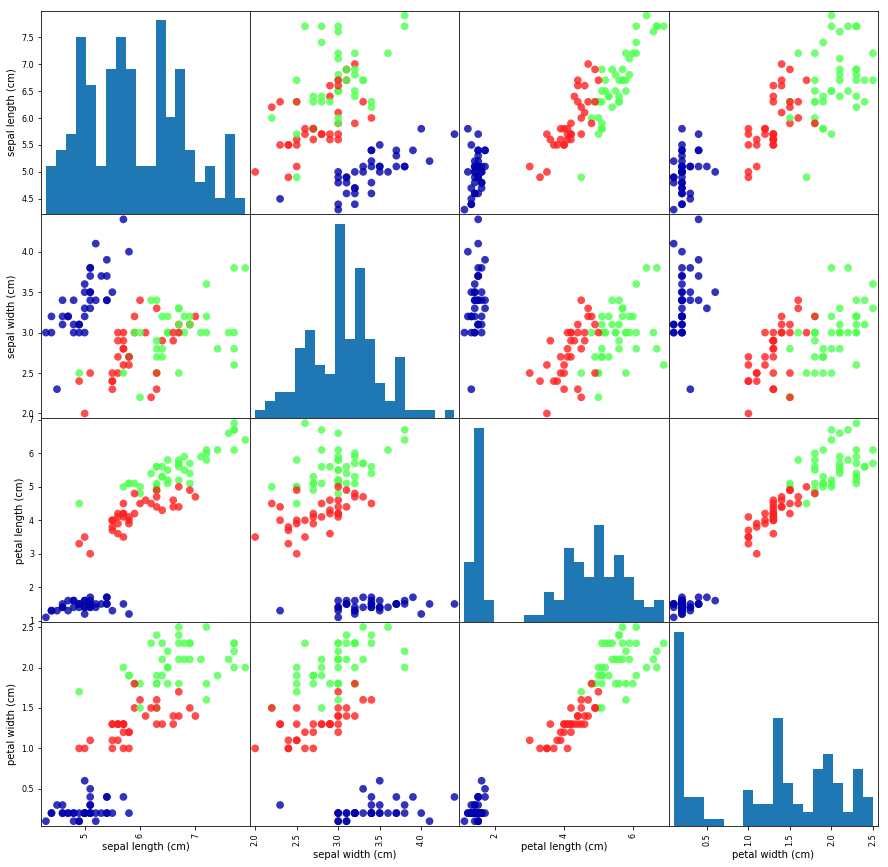

In [24]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

- 그래프로를 보면 세 클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분되는것을 알 수 잇음. 이것으로 미루어보아 클래스를 잘 구분하도록 머신러닝 모델을 학습시킬수 있을것으로 보임!

### 우리의 첫번째 머신러닝모델: k nearest neighbors
### kNN 방식을 사용한 첫번째 모델
- 이 모델은 가장 간단하며 직관적인 학습모델로서, 주어진 훈련 데이터를 보고 특성이 가까운 데이터들이 어떤 레이블을 갖는지를 평균적으로 찾는 방법이다
- 가까운 이웃으로 k개를 조사한다 : k는 훈련데이터에서 새로운 데이터포인트에 가장 가까운 'k개'의 이웃을 찾는 방식임. 
- 파이선의 기계학습 모델은 Estimator 클래스를 사용한다.
- 처음에 할 일은 모델을 선택하는 것이다 (생성자를 만든다). 아래에서 k=1로 선택했다.

In [25]:
from IPython.display import Image

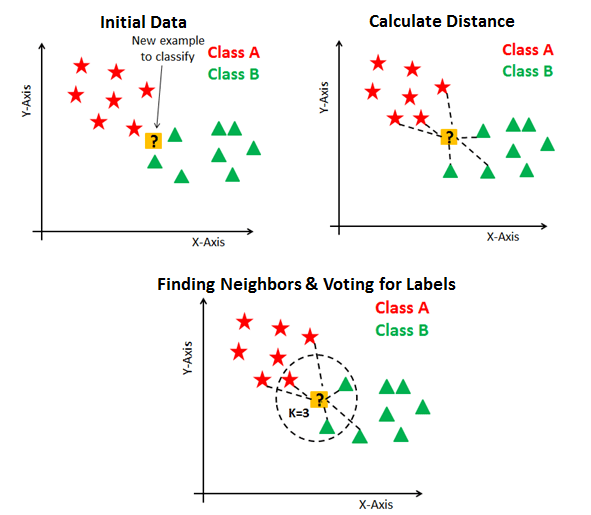

In [26]:
Image('http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png')

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

- 위에서 만든 모델 knn에는 훈련데이터 자체가 모두 들어 있다 (kNN 모델은 동작하려면 특정 파라미터만 구하면 되는 것이 아니라, 훈련 데이터 자체를 필요로 한다)
- 이제 구체적인 모델을 만들려면 (훈련시키려면) fit을 수행해야 한다. 적합한 모델을 만들라는 명령이다.
- fit을 수행하고 나면 모델을 학습시킨 결과를 리턴한다. 즉, 학습된 모델을 리턴한다

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions
### 모델을 사용하여 분류작업 수행
- 새로운 붓꽃을 측정하였을때 이꽃의 품종을 예측(분류)하려면 어떻게 해야 하나
- 먼저 측정한 입력값 X를 만들고 이를 모델 (knn)이 제공하는 predict 메소드의 인자로 주면 된다
- 아래는 임의로 3개의 측정치를 입력하고 결과를 예측해보았다

In [29]:
import numpy as np

- 이제 위 모델을 사용해서 정확한 레이브를 모르는 새 데이터에 대해 예측을 만들 수 있음
- 야생에서 꽃받침의 길이가 5com, 폭이 2.9cm, 꽃잎의 길이가 1cm, 폭이 0.2cm인 붓꽃을 보았다고 가정합시다. 이 붓꽃의 품종은 무엇일까?

In [30]:
X_new = np.array([[1, 3.9, 4.9, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [31]:
prediction = knn.predict(X_new) #knn모델객체의 predict메서드를 사용하면 됨
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


- 그런데 어떻게 이 모델의 결과를 신뢰할 수 있을까?
- 자 이제 앞서 만든 테스트세트를 사용할때가 되었음. 
- 테스트데이터는 모델을 만들때 사용하지 않았고, 테스트 세트에 있는 각 붓꽃의 품종을 정확히 알고 있음
- 따라서, 테스트 데이터에 있는 붓꽃의 품종을 예측하고 실제 레이블(품종)과 비교할 수 있음. 어떻게? 정확도로!

### Evaluating the model
### 모델 평가
- 모델의 성능을 평가하기 위해서 테스트 데이터셋을 사용한다
- 가장 기본적으로는 accuracy (정답률)를 측정한다
- 정답을 얼마나 맞추었는지를 갯수를 세는 방법도 있고 (True의 수를 센다), 또는 이를 내부적으로 계산해 주는 score메소드를 사용할 수도 있다. 참고로 score의 구현 내용이 고정되어 있는 것은 아니므로 실제로 어떻게 동작하는지는 확인해야 한다.


In [32]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [33]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [34]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [35]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook
### 전체 코드
- 아래 전체 코드를 보면 파이선 프로그램이 얼마나 간단한지 알 수 있다.
#### 머신러닝은 5단계로 이루어진다
 - 문제정의 : 분류예측(3가지클래스중에 한가지를 맞추는것)
 - 데이터 전처리(훈련데이터, 테스트데이터 나누기)
 - 모델 선택 (생성자)
 - 학습/예측 (fit)
 - 모델평가 ( predict 또는 점수만 알려면 score)

In [36]:
#1단계 : 분류예측 분류알고리즘 사용해야함
#2단계 :전처리, 훈련데이터와 테스트 데이터를 나누기
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=27)
#3단계: 모델의 선택
knn = KNeighborsClassifier(n_neighbors=1)
#4단계:학습예측
knn.fit(X_train, y_train)
#5단계:모델의 평가
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도 : 0.95


 ## 6단계?:커뮤니케이션 : 다른 식물학자에게 이 애플리케이션을 신뢰하고 사용할만 하다고 시각화하여 공유!